In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
test=pd.read_csv("/content/drive/MyDrive/NIDS/Test_data.csv")

In [ ]:
train=pd.read_csv("/content/drive/MyDrive/NIDS/Train_data.csv")

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.shape

(25192, 42)

In [ ]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
#Since the train dataset does not contain any missing values we will be skipping this step.
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [ ]:
#we can skip this too as there are no duplicate rows
print(f"No. of duplicate rows: {train.duplicated().sum()}")

No. of duplicate rows: 0


<Axes: xlabel='class', ylabel='count'>

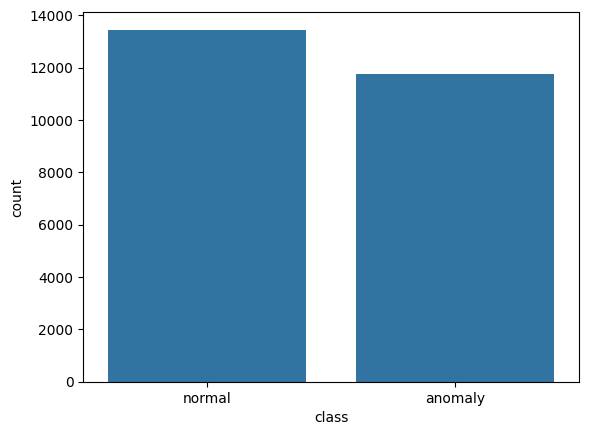

In [ ]:
sns.countplot(x=train['class'])

In [ ]:
print('Class distribution of the Training set:\n',train['class'].value_counts())

Class distribution of the Training set:
 normal     13449
anomaly    11743
Name: class, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object': #checking for categorical vlaue
                label_en = LabelEncoder() # LabelEncoder value is generated which then converts categorical values into numerical values
                df[col] = label_en.fit_transform(df[col]) #label encoder

le(train)
le(test)

In [ ]:
#removes the column num_outbound_cmds from train and test
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools

In [ ]:
rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=10)#RFE object named "rfe" with the Random Forest Classifier "rfc" as the estimator and specifies that it should select 10 features.
rfe = rfe.fit(X_train, Y_train)#making the line fit the RFE model on the training data set

#list comprehension
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]#mapping between the selected features and their corresponding column names.
selected_features = [v for i, v in feature_map if i==True]#selected features by filtering out those with a selection status of True.

selected_features

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate']

In [ ]:
X_train = X_train[selected_features] #ensures that only the selected features are retained for further analysis or modeling

In [ ]:
scale = StandardScaler() #standardizing features by removing the mean and scaling to unit variance
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)# fitting the scaler to the data and then transforming it, standardizing each feature.

In [ ]:
#70% of the data will be used for training, and the remaining 30% for testing
'''randomness introduced during the data split remains consistent across different
runs of the code, providing stability and allowing for reliable comparisons between different models or experiments'''
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [ ]:
x_train.shape

(17634, 10)

In [ ]:
x_test.shape

(7558, 10)

In [ ]:
y_train.shape #1D array to showcase shape of the target variable/preiction variable

(17634,)

In [ ]:
y_test.shape #1D array to showcase shape of the target variable/preiction variable

In [ ]:
import time

In [ ]:
  from sklearn.linear_model import LogisticRegression

  clfl = LogisticRegression(max_iter = 1200000) #1200000 iterations for the solver to converge.
  start_time = time.time()
  clfl.fit(x_train, y_train.values.ravel())
  end_time = time.time()
  print("Training time: ", end_time-start_time)

Training time:  0.05705380439758301


In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.2 MB/s eta 0:00:00


In [ ]:
import optuna #to help automate the the process of tuning hyperparameters to improve the performance
optuna.logging.set_verbosity(optuna.logging.WARNING) #focusing on critical information while reducing the amount of unnecessary output

In [ ]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False) #values are suggested linearly
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train) #training to fit on the values of x_train features adn y_trains targets
    accuracy = classifier_obj.score(x_test, y_test) #testing data for accuracy based on x_test and y_test values
    return accuracy

In [ ]:
#hyperparameter optimization by evaluating one trial (one set of hyperparameters)
#best trial, including the hyperparameters that led to the highest accuracy score based on the defined objective function.
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.9812119608362001], datetime_start=datetime.datetime(2024, 3, 1, 7, 3, 50, 702189), datetime_complete=datetime.datetime(2024, 3, 1, 7, 3, 51, 769509), params={'KNN_n_neighbors': 13}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [ ]:
#training based on best hyperparameter optained and then calculating the accuracy scores
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9809458999659748
Test Score: 0.9812119608362001


In [ ]:
#training the data
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)# using the entropy criteria to measure the impurity of the split and depth 4 to minimize the number of nodes
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.08766961097717285


In [ ]:
#testing the data
start_time = time.time()
y_test_pred = clfd.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.003377676010131836


In [ ]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [ ]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=21, state=TrialState.COMPLETE, values=[0.9964276263561789], datetime_start=datetime.datetime(2024, 3, 1, 7, 6, 6, 442983), datetime_complete=datetime.datetime(2024, 3, 1, 7, 6, 6, 489415), params={'dt_max_depth': 32, 'dt_max_features': 8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=21, value=None)


In [ ]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")

Train Score: 1.0
Test Score: 0.9940460439269648


In [79]:
data = [["KNN", KNN_train, KNN_test],
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.980946 │     0.981212 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.928774 │     0.923128 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     0.994046 │
╘═════════════════════╧═══════════════╧══════════════╛


In [ ]:
SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# KNN
knn = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score

#
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [ ]:
#cross-validated precision and recall scores for each model are calculated using the training data
#provide an estimate of the model's performance on unseen data now it is test data, accounting for the variability in the data and the model's ability to generalize to new instances.
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

In [ ]:
#insights into the average precision and recall performance of each model, including information on the variability or spread of scores around the mean values.
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

*************** KNeighborsClassifier Model Validation ***************
Mean precision: 
 98.45 % +- 0.48

Mean recall: 
 98.24 % +- 0.54

**************** LogisticRegression Model Validation ****************
Mean precision: 
 91.35 % +- 0.57

Mean recall: 
 95.72 % +- 0.67

************** DecisionTreeClassifier Model Validation **************
Mean precision: 
 99.54 % +- 0.22

Mean recall: 
 99.51 % +- 0.17



<Axes: >

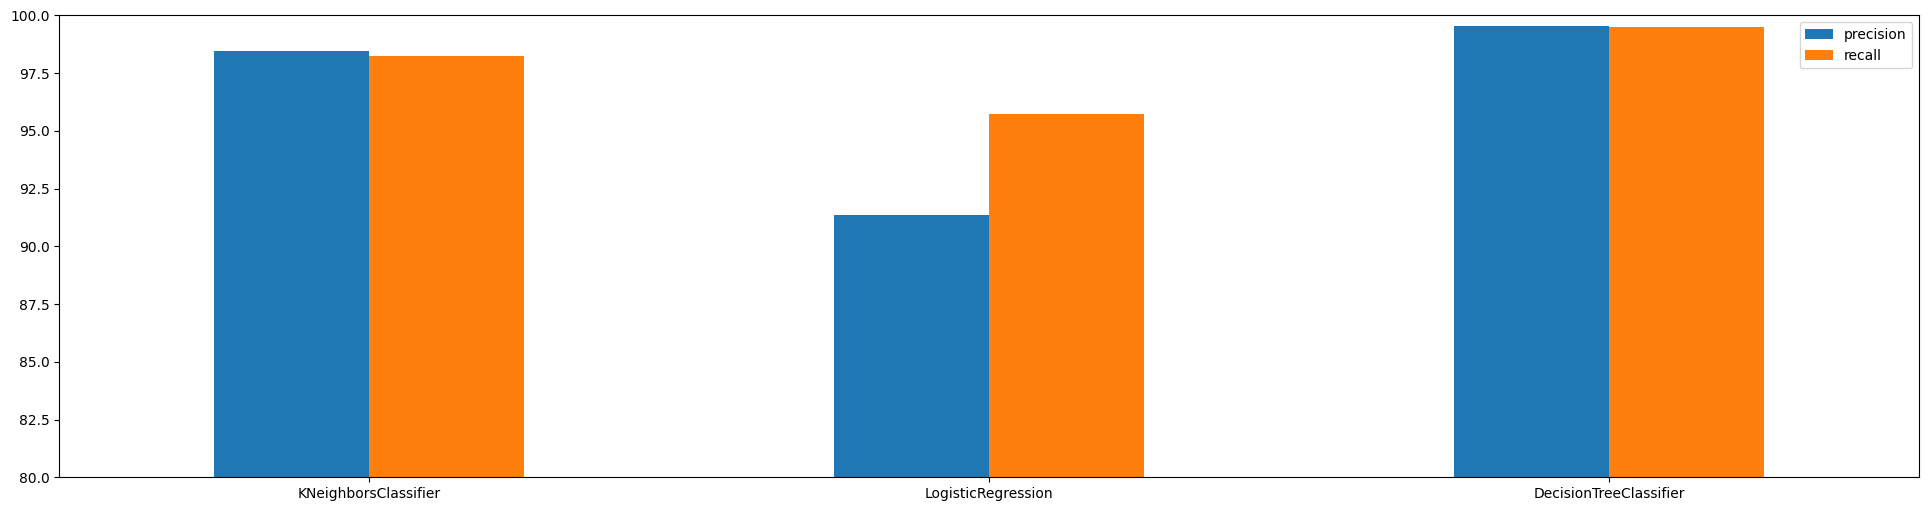

In [ ]:
#visualize and compare the mean precision and recall scores of different models, providing insights into their overall performance in classification tasks.
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [ ]:
#storing the values of each of the models into key value pairs.
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [ ]:
#each model is trained on the training data and then used to predict outcomes on the test data.
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions have been completed successfully.")

Predictions complete.


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

#assess and compare the performance of different models in classifying instances as "normal" or "anomaly" based on their predictions on the test data.
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

*************** KNeighborsClassifier Model Testing ***************
[[3435   63]
 [  65 3995]]
---------------
              precision    recall  f1-score   support

      normal       0.98      0.98      0.98      3498
     anamoly       0.98      0.98      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558

**************** LogisticRegression Model Testing ****************
[[3127  371]
 [ 210 3850]]
----------------
              precision    recall  f1-score   support

      normal       0.94      0.89      0.91      3498
     anamoly       0.91      0.95      0.93      4060

    accuracy                           0.92      7558
   macro avg       0.92      0.92      0.92      7558
weighted avg       0.92      0.92      0.92      7558

************** DecisionTreeClassifier Model Testing **************
[[3483   15]
 [  29 4031]]
--------------
              pr

<Axes: >

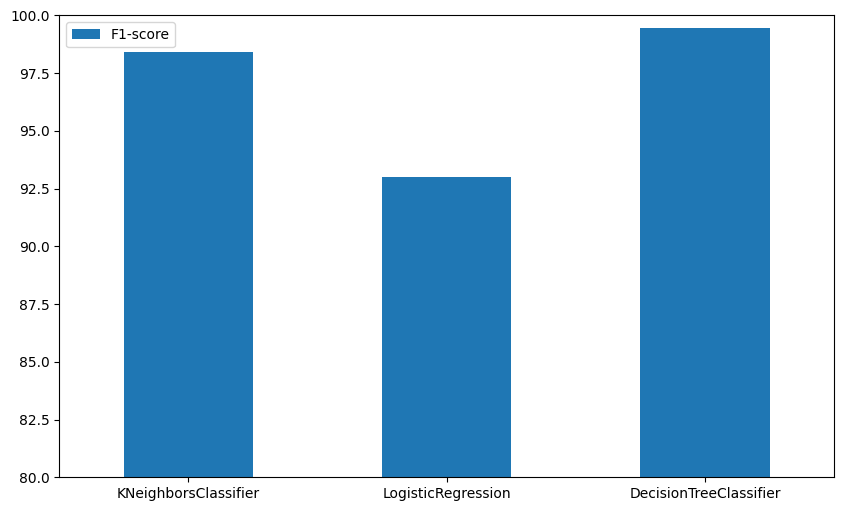

In [80]:
#calculates the F1 score for each model by comparing their predictions with the actual test labels
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)